# CLUSTERING ASSIGNMENT on 
# FINDING OUT THE COUNTRIES IN DIRE NEED OF AID

### Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

### Objective : Main task is to cluster the countries using some socio-economic and health factors that determine the overall development of the country using KMeans and Hierarchical Clustering algorithms. 


## Table of Contents:
#### 1. Loading Libraries and Reading the data 
    1.1. Load libraries
    1.2. Read the Data
#### 2. Exploratory Data Analysis
    2.1. Shape of Data
    2.2. Data Conversion
    2.3. Visualising Missing Values
    2.4. Datatypes of variables
    2.5. Checking for Duplicates
    2.6. Describing Data
    2.7. Correlation Heatmap
    2.8. Univariate Analysis and Outlier Detection 
    2.9. Bivariate Analysis
#### 3. Data Preparation for Clustering
    3.1 Outlier Treatment
    3.2 Checking Hopkins Statistics
#### 4. Scaling Data using StandardScaler
#### 5. K Means Clustering
    5.1. Elbow Method
    5.2. Silhouette Analysis
    5.3. Visualising clusters based on labels 
    5.4. Cluster Profiling wrt gdpp, income, child mortality
    5.5. List of TOP 10 countries in Direst Need of Aid by using K-means Clustering
#### 6. Hierarchical Clustering
    6.1. Single Linkage
    6.2. Complete Linkage
    6.3. Visualising clusters based on labels 
    6.4. Cluster Profiling wrt gdpp, income, child mortality
    6.5. List of TOP 10 countries in Direst Need of Aid by using Hierarchical Clustering
#### 7. Results
#### 8. Recommendations

## 1. Loading the libraries and reading the data

### 1.1 ) Loading the necessary libraries

In [1]:
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # for  linear algebra
import pandas as pd # for data processing

# For Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import missingno as msno

# For scaling the data
from sklearn.preprocessing import StandardScaler

# To perform K-means clustering
from sklearn.cluster import KMeans

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1.2 ) Reading the data

In [3]:
country_data=pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Reading the data data dictionary 
country_dict=pd.read_csv('data-dictionary+.csv')
country_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


## 2. Exploratory Data Analysis
### 2.1. Shape of data 

In [5]:
country_data.shape

(167, 10)

**So there are 167 countries and 10 features in our dataset.**

### 2.2. Data Conversion

Converting exports, health and imports variables into specified percentages of GDPP per capita.

In [6]:
country_data['exports']=country_data['exports']*country_data['gdpp']/100
country_data['imports']=country_data['imports']*country_data['gdpp']/100
country_data['health']=country_data['health']*country_data['gdpp']/100

#Checking the values after conversion 
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### 2.3. Visualising Missing Values


In [7]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

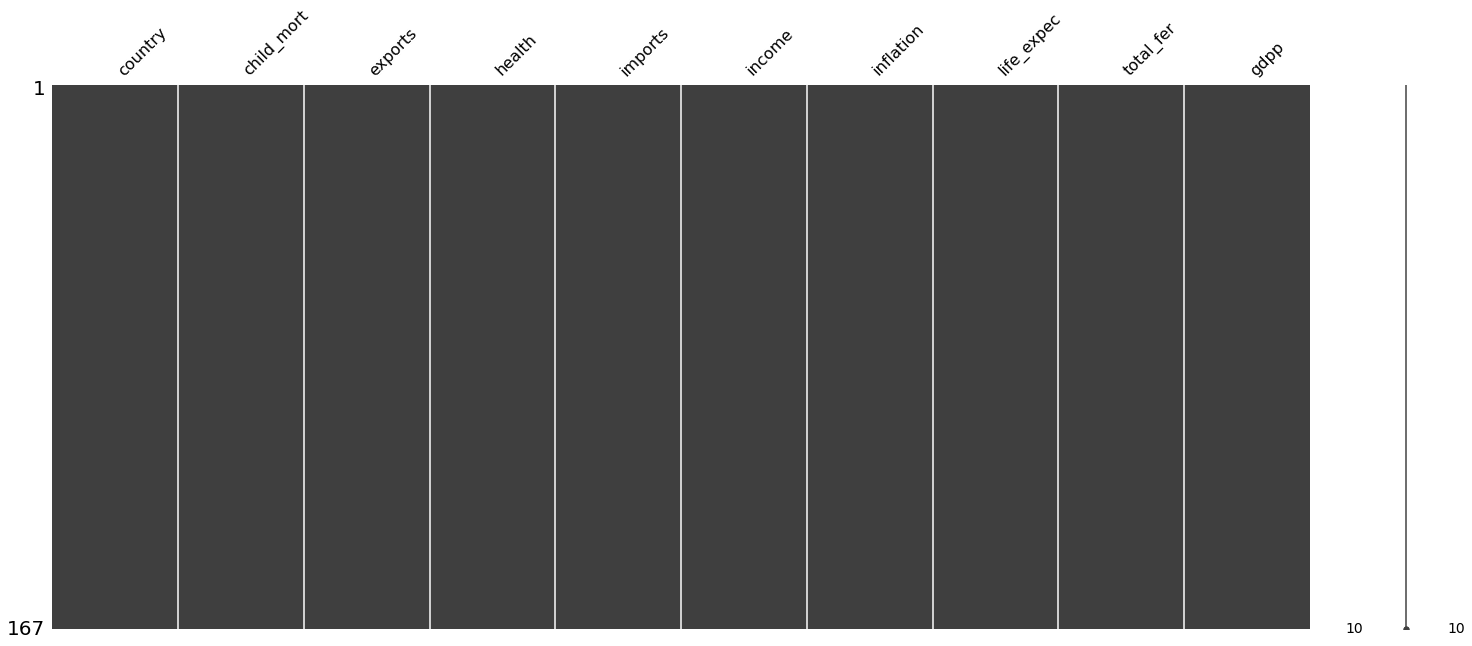

In [8]:
msno.matrix(country_data)

**We see that there are no missing values in our dataset.**

### 2.4. Datatypes of variables:

In [9]:
# checking the datatype of variables
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We see that all the datatypes are in correct format.

### 2.5 Checking for duplicates

In [10]:
country_data[country_data.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


We see there are no duplicates in our dataset.

### 2.6. Describing Data

In [11]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2.7 Correlation Heatmap

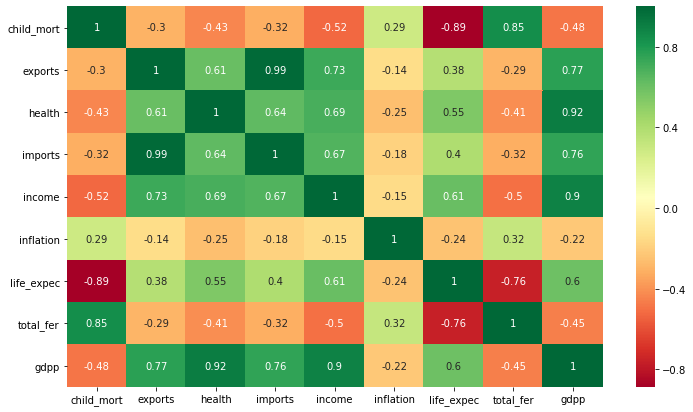

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(country_data.corr(),annot=True,cmap='RdYlGn')

### Inferences from the above graph:

1) exports and imports are highly correlated to each other.

2) child_mort is having high negative correlation with life_expec and is highly positively correlated with total_fer.

3) gdp is highly correlated with exports , health, imports , income and life_expec.

4) total_fer is highly negatively correlated with life_expec.

### 2.8 Univariate Analysis

### **2.8.1 Checking the distribution of all the numerical variables through Kernel density distribution plot.**

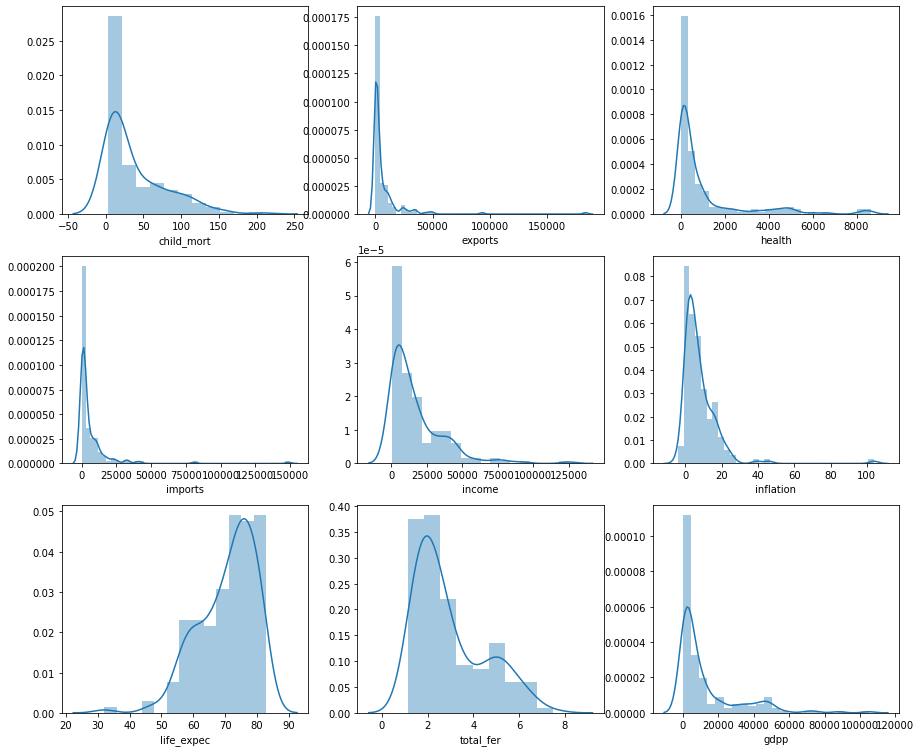

In [13]:
plt.figure(figsize = (15,13))
feature = country_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country_data[i[1]])

We will use the three features : child_mort , income and gdpp for cluster profiling . 

### 2.8.2 Checking for outliers through Boxplots

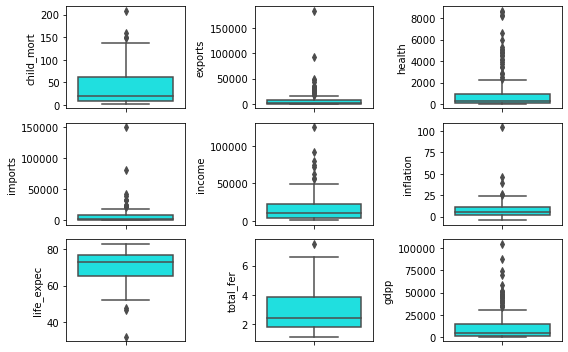

In [14]:
plt.figure(figsize = (8,5),tight_layout=True)
feature = country_data.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country_data[i[1]],orient='v',color='cyan')

### Inferences from the above plots:

* All features contain one or more outliers .
* A large number of outliers are present in 'gdpp' and 'health'
* Since we have limited number of countries , it is not suitable to remove these outliers as removing them may make the countries which are in dire need of aid also getting removed .
* So in order to handle these outliers , we can cap these outliers .

### 2.9  Bivariate Analysis 

#### 2.9.1 Pairplot

<Figure size 576x360 with 0 Axes>

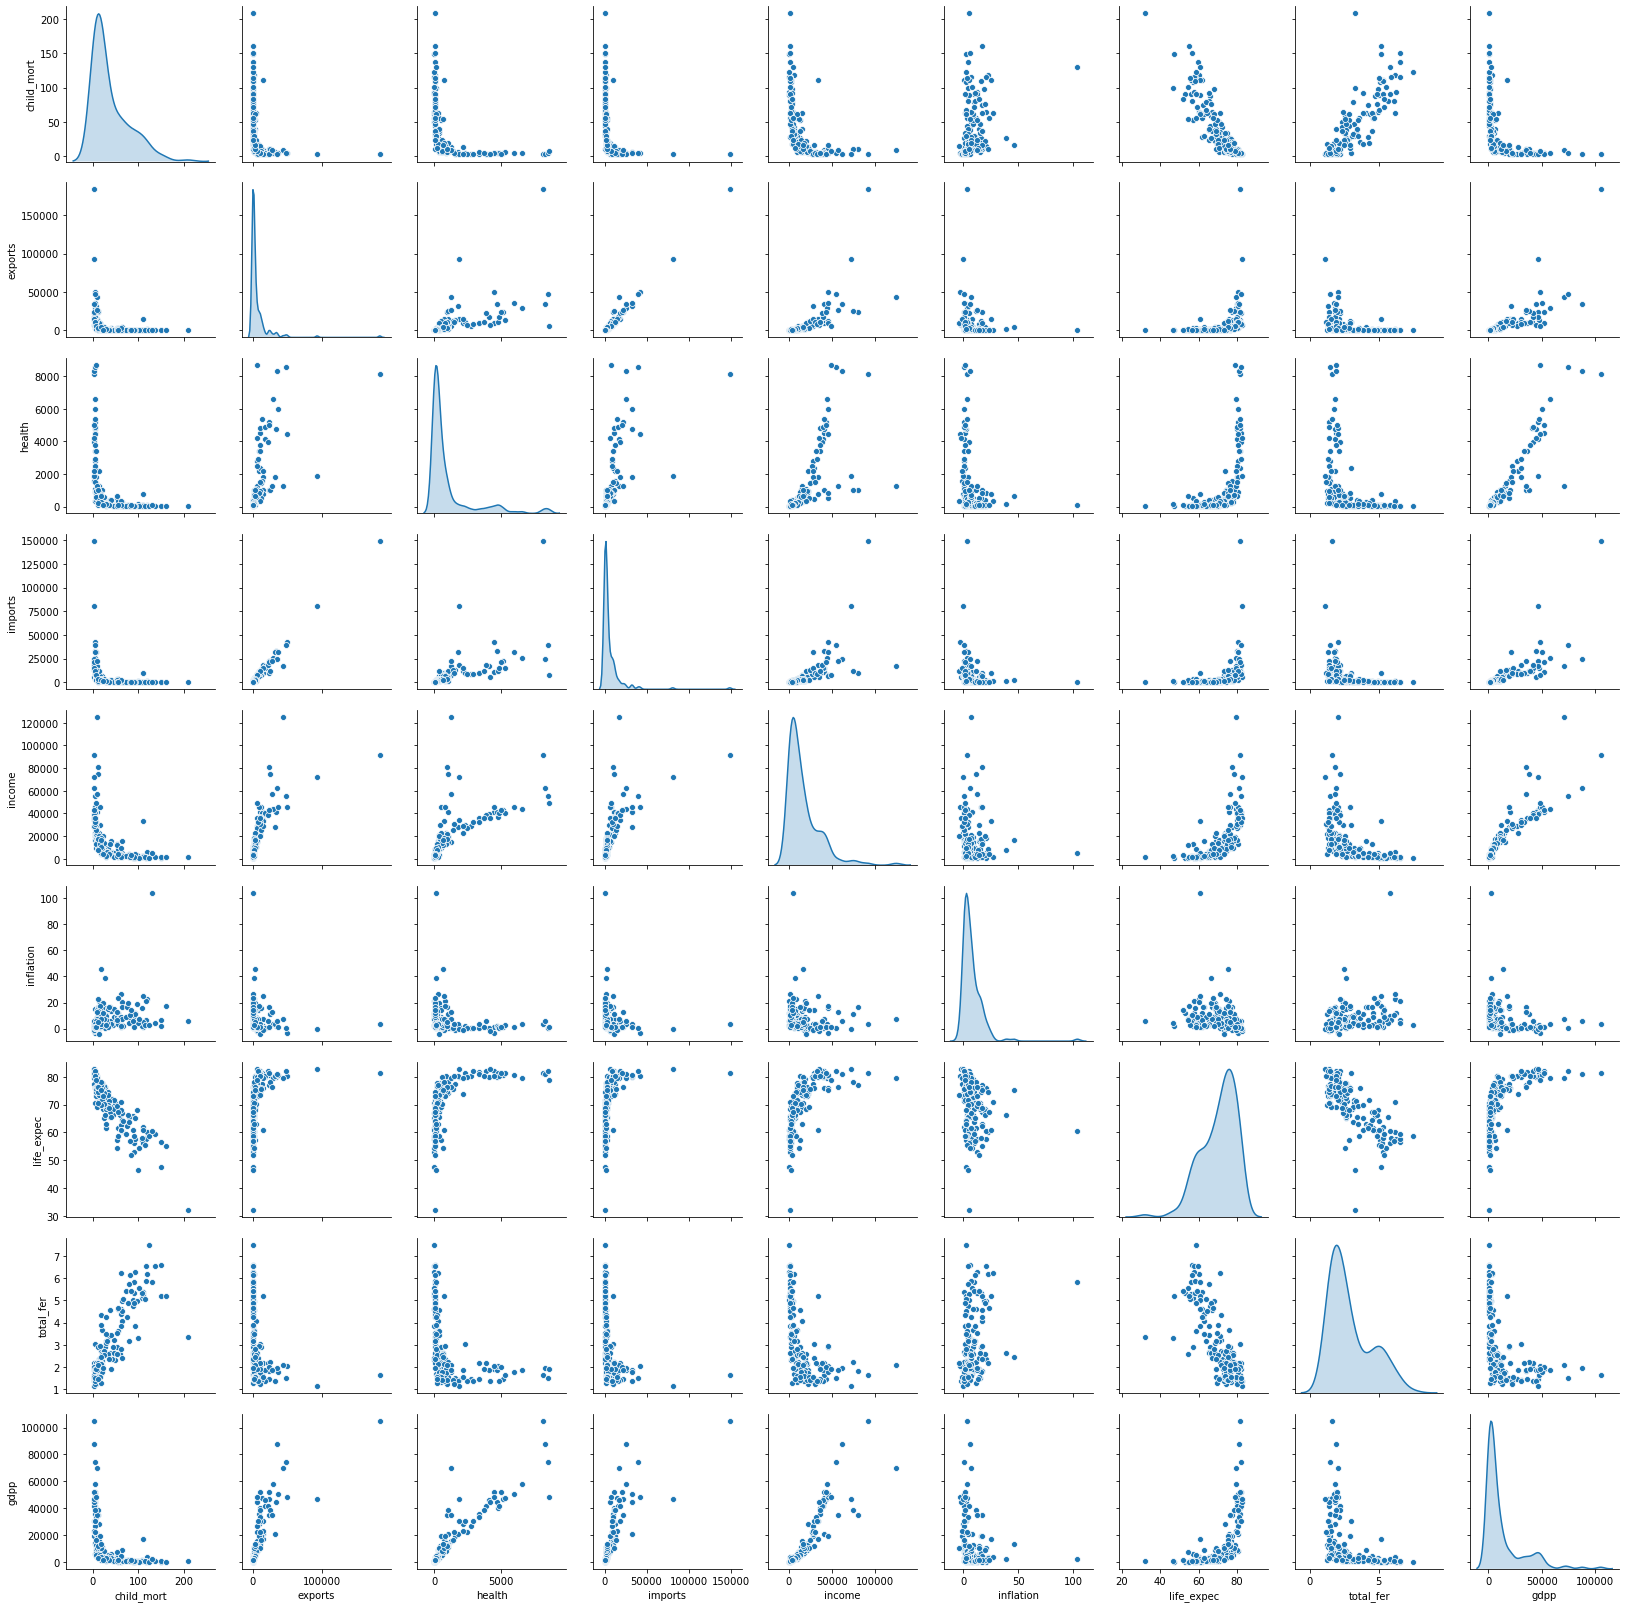

In [15]:
plt.figure(figsize = (8,5))
sns.pairplot(country_data,diag_kind = 'kde')

### Inferences from the pairplot above:

1. gdpp and income are having linear relationship so  when gdpp is more , then income is also high and vice-versa.

2. imports and exports are having linear relationship so when imports are more, exports are also more.

3. child_mort and total_fer are having linear relationship  .


## 3. Data Preparation for Clustering 

### 3.1 Outlier Treatment

### Capping the outliers:

* **For all the columns except 'child_mort' , we will cap the higher range outliers because if we cap the lower range then we may end up in loosing some countries that actually need aid.**
* **For the 'child_mort' column we will cap the lower range outliers .**


In [16]:
# Capping the high range of outliers in columns: 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 
# 'total_fer', 'gdpp'

q4 = country_data['exports'].quantile(0.99)
country_data['exports'][country_data['exports']>= q4] = q4

q4 = country_data['health'].quantile(0.99)
country_data['health'][country_data['health']>= q4] = q4

q4 = country_data['imports'].quantile(0.99)
country_data['imports'][country_data['imports']>= q4] = q4

q4 = country_data['income'].quantile(0.99)
country_data['income'][country_data['income']>= q4] = q4

q4 = country_data['inflation'].quantile(0.99)
country_data['inflation'][country_data['inflation']>= q4] = q4

q4 = country_data['life_expec'].quantile(0.99)
country_data['life_expec'][country_data['life_expec']>= q4] = q4

q4 = country_data['total_fer'].quantile(0.99)
country_data['total_fer'][country_data['total_fer']>= q4] = q4

q4 = country_data['gdpp'].quantile(0.99)
country_data['gdpp'][country_data['gdpp']>= q4] = q4


# Capping the low range outliers of the column: 'child_mort'

q1 = country_data['child_mort'].quantile(0.01)
country_data['child_mort'][country_data['child_mort']<=q1] = q1

###  3.2 Checking Hopkins Statistics 

In [17]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(country_data.drop('country',axis=1))

0.919134139846197

#### We see that the value of Hopkins statistic is close to 1,then we can conclude that the dataset  is significantly a clusterable data.


### 4. Scaling Data using StandardScaler

In [19]:
#  Creating another dataframe 'df' without the column 'country'
df=country_data.drop('country',axis=1)

In [20]:
#Scaling the 'df' and storing the scaled data into 'df1'
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [21]:
# Converting 'df1' into a dataframe 
df1=pd.DataFrame(df1)
df1.columns=df.columns[:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


**We would be using the following two methods for performing clustering :**

**1) KMeans Clustering**

**2) Hierarchical Clustering**

## **5) K-MEANS CLUSTERING :**

### **Finding the Optimal Number of Clusters for KMeans Clustering by two methods :**
1) Elbow Method ( SSD - Sum of Squared Distance method)

2) Silhouette Analysis

### **5.1) Elbow Method (SSD - Sum of Squared Distance)**

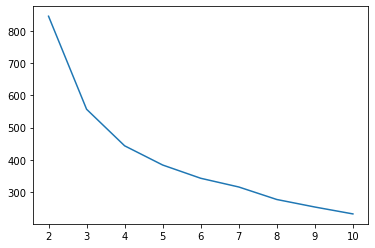

In [22]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k).fit(df1)
  ssd.append([k,kmean.inertia_])

plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

#### The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


### **5.2) Silhouette Analysis**

**silhouette score = 𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)**
 
𝑝  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞  is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [23]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k).fit(df1)
  ss.append([k,silhouette_score(df1,kmeans.labels_)])
  print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_score(df1,kmeans.labels_))) 

For n_clusters=2, the silhouette score is 0.4693935858809981
For n_clusters=3, the silhouette score is 0.40354406834617873
For n_clusters=4, the silhouette score is 0.39198304727104893
For n_clusters=5, the silhouette score is 0.3841728541997584
For n_clusters=6, the silhouette score is 0.2788709279636047
For n_clusters=7, the silhouette score is 0.291298852947973
For n_clusters=8, the silhouette score is 0.28695696340278476
For n_clusters=9, the silhouette score is 0.30617213001814464
For n_clusters=10, the silhouette score is 0.282012745230329


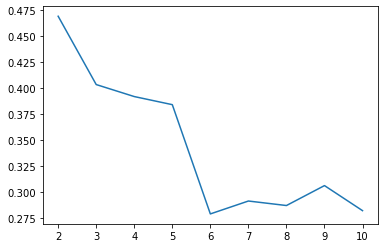

In [24]:
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

#### The location of the maximum is considered as the appropriate number of clusters.

#### From the above two methods , we can choose the optimal number of clusters for K-Means clustering as k=3.

In [25]:
#Performing KMeans clustering with k=3

kmean=KMeans(n_clusters=3,random_state=100)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [26]:
# Assigning labels(cluster number)
label=pd.DataFrame(kmean.labels_,columns=['label'])

In [27]:
# Creating a new dataframe 'df1_kmean' which is a copy of the original dataframe and concatenating the labels to the
# new dataframe 'df1_kmean'

df1_kmean=country_data.copy()
df1_kmean=pd.concat([df1_kmean,label],axis=1)
df1_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [28]:
# lets see how many datapoints we have in each cluster
df1_kmean.label.value_counts()

2    90
0    48
1    29
Name: label, dtype: int64

 ## 5.3. Visualising clusters based on labels 

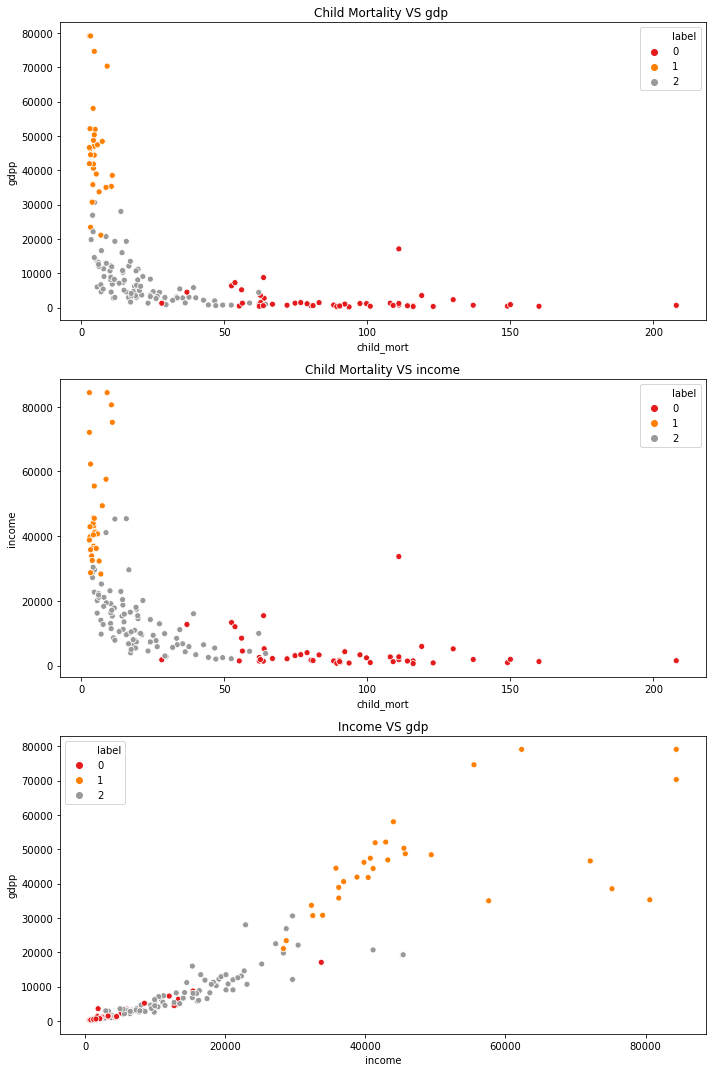

In [29]:
fig, axes = plt.subplots(3,figsize=(10,15),tight_layout=True)

ax0=sns.scatterplot(x='child_mort',y='gdpp',hue='label',data=df1_kmean,palette='Set1',ax=axes[0])
ax0.title.set_text('Child Mortality VS gdp ')

ax1=sns.scatterplot(x='child_mort',y='income',data=df1_kmean,hue='label',palette='Set1',ax=axes[1])
ax1.title.set_text('Child Mortality VS income')

ax2=sns.scatterplot(x='income',y='gdpp',data=df1_kmean,hue='label',palette='Set1',ax=axes[2])
ax2.title.set_text('Income VS gdp')

## 5.4. Cluster Profiling wrt gdpp, income, child mortality

In [30]:
#Cluster Profiling
df1_cluster=df1_kmean.drop(['exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('label').mean()
df1_cluster

,child_mort,income,gdpp
label,,,
0,91.610417,3897.354167,1909.208333
1,4.989655,47784.413793,46068.137931
2,20.547778,13804.333333,7808.577778


#### Analysing the clusters by comparing how the 'gdpp', 'child_mort' and 'income' vary for each cluster of countries .

### Comparisons between the clusters 

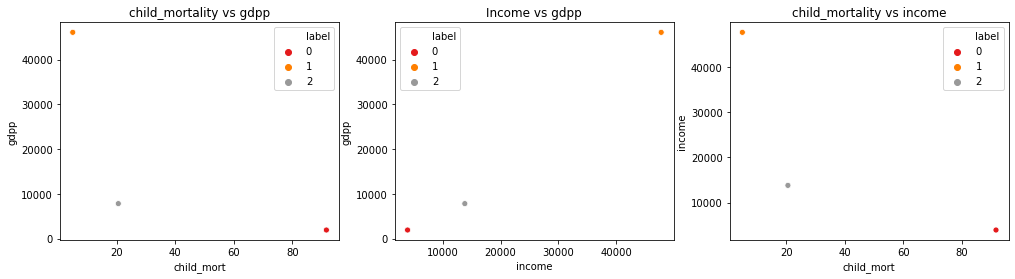

In [31]:
fig, axes = plt.subplots(1,3,figsize=(17,4))

ax0=sns.scatterplot(x='child_mort',y='gdpp',data=df1_cluster,hue=df1_cluster.index,palette='Set1',ax=axes[0])
ax0.title.set_text('child_mortality vs gdpp')

ax1=sns.scatterplot(x='income',y='gdpp',data=df1_cluster,hue=df1_cluster.index,palette='Set1',ax=axes[1])
ax1.title.set_text('Income vs gdpp')

ax2=sns.scatterplot(x='child_mort',y='income',data=df1_cluster,hue=df1_cluster.index,palette='Set1',ax=axes[2])
ax2.title.set_text('child_mortality vs income')

### **Label 0 :**
* Subplot(1) shows **High child mortality , low gdpp**
* Subplot(2) shows**Low income , low gdpp**
* Subplot(3) shows **High child mortality , low income**

Therefore these can be considerd as  ***Under-developed Countries.***

### **Label 1 :**
* Subplot(1) shows **Low child mortality , high gdpp**
* Subplot(2) shows **high income , high gdpp**
* Subplot(3) shows **Low child mortality , high income**

 Therefore these can be considerd as ***Developed Countries.***


### **Label 2 :**
* Subplot(1) shows **Low child mortality , low gdpp**
* Subplot(2) shows **low income , low gdpp**
* Subplot(3) shows **Low child mortality , low income**

Therefore these can be considerd as ***Developing Countries***. 

#### Renaming the Labels into countries as categorized above ie., Developing , Developing and Underdeveloped Countries.

In [32]:
df1_cluster.rename(index={0: 'Under-Developed'},inplace=True)
df1_cluster.rename(index={1: 'Developed'},inplace=True)
df1_cluster.rename(index={2: 'Developing'},inplace=True)

### **Understanding the Clusters by Plotting them based on three factors :**
* gdpp
* income
* child_mort

### **1) Barplots:**


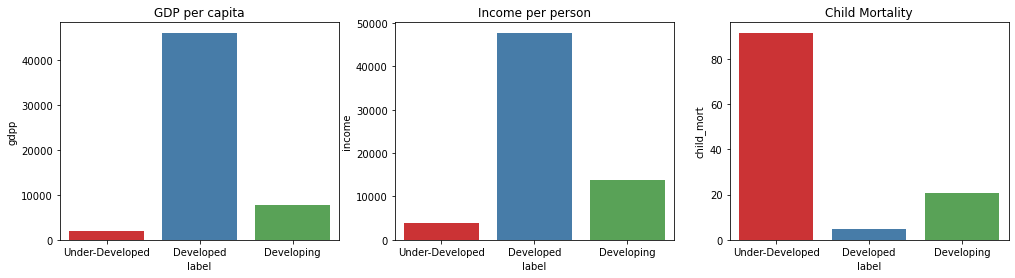

In [33]:
fig, axes = plt.subplots(1,3,figsize=(17,4))

ax0=sns.barplot(x=df1_cluster.index,y='gdpp',data=df1_cluster,palette='Set1',ax=axes[0])
ax0.title.set_text('GDP per capita')

ax1=sns.barplot(x=df1_cluster.index,y='income',data=df1_cluster,palette='Set1',ax=axes[1])
ax1.title.set_text('Income per person')

ax2=sns.barplot(x=df1_cluster.index,y='child_mort',data=df1_cluster,palette='Set1',ax=axes[2])
ax2.title.set_text('Child Mortality')

**Inferences from the above bar chart :**
* All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and under-developed countries are having the least GDPP values.
* All the developed countries are having high income per person, developing countries are having average income per person and under-developed countries are having the least income per person.
* All the developed countries are having least number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and under-developed countries are having the highest death rate.

### **2) Scatterplots:**

Adding a column 'Clustered Countries' to the dataframe df1_kmeans to visualize all the countries under the clusters of Developing , Developed and Underdeveloped countries.

In [34]:
for i,label in enumerate(df1_kmean.label):
    if(label==0):
        df1_kmean.loc[i,'Clustered Countries']='Under-Developed'
    elif(label==1):
        df1_kmean.loc[i,'Clustered Countries']='Developed'
    else:
        df1_kmean.loc[i,'Clustered Countries']='Developing'
        
# Viewing the dataframe after assigning the above column to it 
df1_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,Clustered Countries
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,Developing


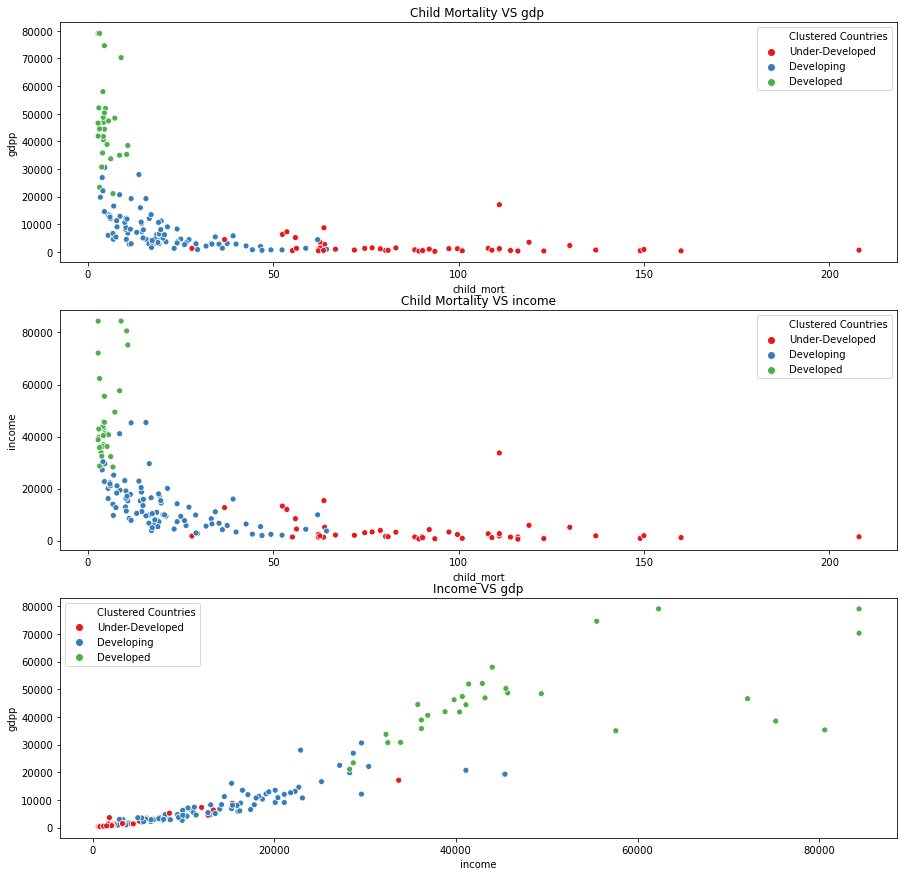

In [35]:
# Visualizing the clusters through scatterplots

fig, axes = plt.subplots(3,figsize=(15,15))

ax0=sns.scatterplot(x='child_mort',y='gdpp',data=df1_kmean,hue='Clustered Countries',palette='Set1',ax=axes[0])
ax0.title.set_text('Child Mortality VS gdp ')

ax1=sns.scatterplot(x='child_mort',y='income',data=df1_kmean,hue='Clustered Countries',palette='Set1',ax=axes[1])
ax1.title.set_text('Child Mortality VS income')

ax2=sns.scatterplot(x='income',y='gdpp',data=df1_kmean,hue='Clustered Countries',palette='Set1',ax=axes[2])
ax2.title.set_text('Income VS gdp')

**Inferences from the above scatterplots:**
* In the Child_mortality VS gdpp subplot : we observe that clusters are formed which show that if child_mortality is low, the gdpp is high and vice versa.
* In the Child_mortality VS Income subplot: we observe that clusters are formed which show that if child mortality is low then income is high and vice versa.
* In the Income VS gdpp subplot: we observe that clusters are formed which show that if income is more then gdpp is also more and vice versa.

### **3) Boxplots:**

Text(0.5, 1.0, 'Child Mortality rate')

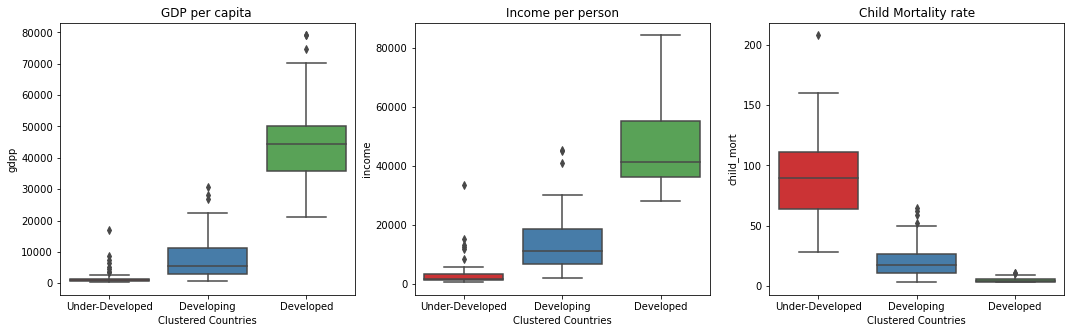

In [36]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

ax0=sns.boxplot(x='Clustered Countries',y='gdpp',data=df1_kmean,palette='Set1',ax=axes[0])
ax0.set_title('GDP per capita ')

ax1=sns.boxplot(x='Clustered Countries',y='income',data=df1_kmean,palette='Set1',ax=axes[1])
ax1.set_title('Income per person')

ax2=sns.boxplot(x='Clustered Countries',y='child_mort',data=df1_kmean,palette='Set1',ax=axes[2])
ax2.set_title('Child Mortality rate')

**Inferences from the boxplots above:**

* From the boxplot above for gdp per capita we see that gdp is high for developed countries , less in developing countries and least in under-developed countries.
* From the boxplot above for income per person we see that income is high for developed countries , less in developing countries and least in under-developed countries.
* From the boxplot above for child mortality rate we see that child mortality is high for under-developed countries , less in developing countries and least in developed countries.




### **Analysing the different countries under the three clusters on the basis of :**
* gdpp
* income
* child_mort


### **1) Developed Countries :**

Text(0.5, 1.0, 'Developed Countries Ranking based on Child Mortality Rate')

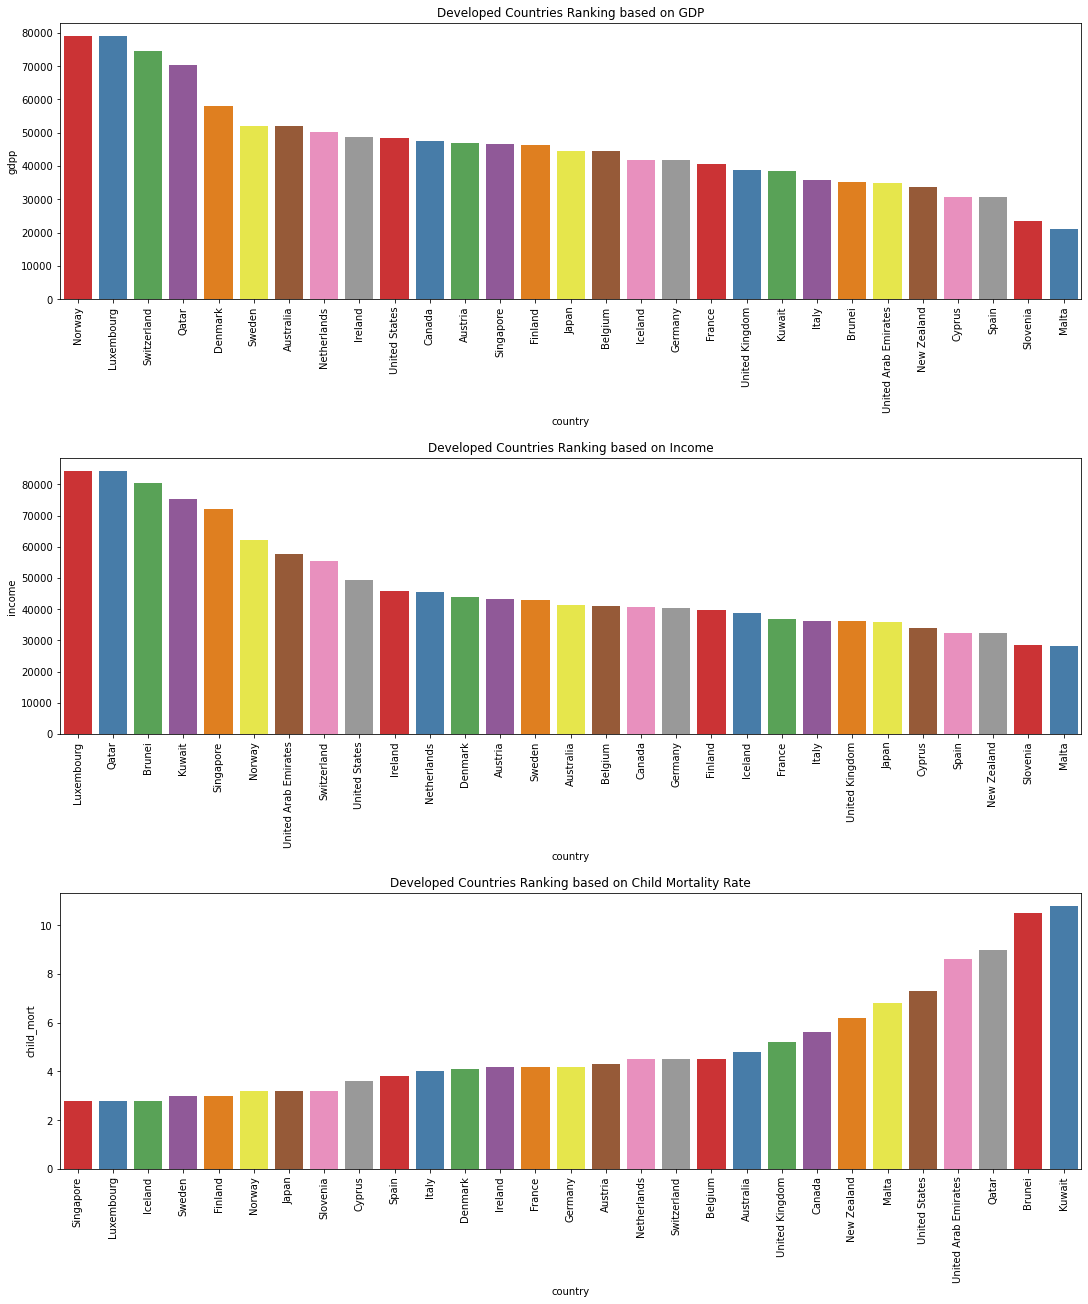

In [37]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the developed countries on the basis of 'gdp'
gdp_developed=df1_kmean[df1_kmean['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Developed Countries Ranking based on GDP',fontsize=12)

# Analysing the developed countries on the basis of 'income'
income_developed=df1_kmean[df1_kmean['Clustered Countries']=='Developed'].sort_values(by='income',ascending=False)
ax1=sns.barplot(x='country',y='income',data=income_developed,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Developed Countries Ranking based on Income',fontsize=12)

# Analysing the developed countries on the basis of 'child_mort'
child_mort_developed=df1_kmean[df1_kmean['Clustered Countries']=='Developed'].sort_values(by='child_mort')
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_developed,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Developed Countries Ranking based on Child Mortality Rate',fontsize=12)


### **Finding out the TOP 10 Developed countries based on : *GDP , Income and child_mort***



In [38]:
# Finding the TOP 10 Developed countries on the basis of 'gdp'
print('TOP 10 Developed countries based on high GDP are :')
for countries in gdp_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developed countries on the basis of 'income'
print('TOP 10 Developed countries based on high income are :')
for countries in income_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developed countries on the basis of 'child_mort'
print('TOP 10 Developed countries based on low child mortality rate are :')
for countries in child_mort_developed.country[:10]:
  print(countries)


TOP 10 Developed countries based on high GDP are :
Norway
Luxembourg
Switzerland
Qatar
Denmark
Sweden
Australia
Netherlands
Ireland
United States


TOP 10 Developed countries based on high income are :
Luxembourg
Qatar
Brunei
Kuwait
Singapore
Norway
United Arab Emirates
Switzerland
United States
Ireland


TOP 10 Developed countries based on low child mortality rate are :
Singapore
Luxembourg
Iceland
Sweden
Finland
Norway
Japan
Slovenia
Cyprus
Spain


### **2) Developing Countries :**

Text(0.5, 1.0, 'Developing Countries Ranking based on Child Mortality Rate')

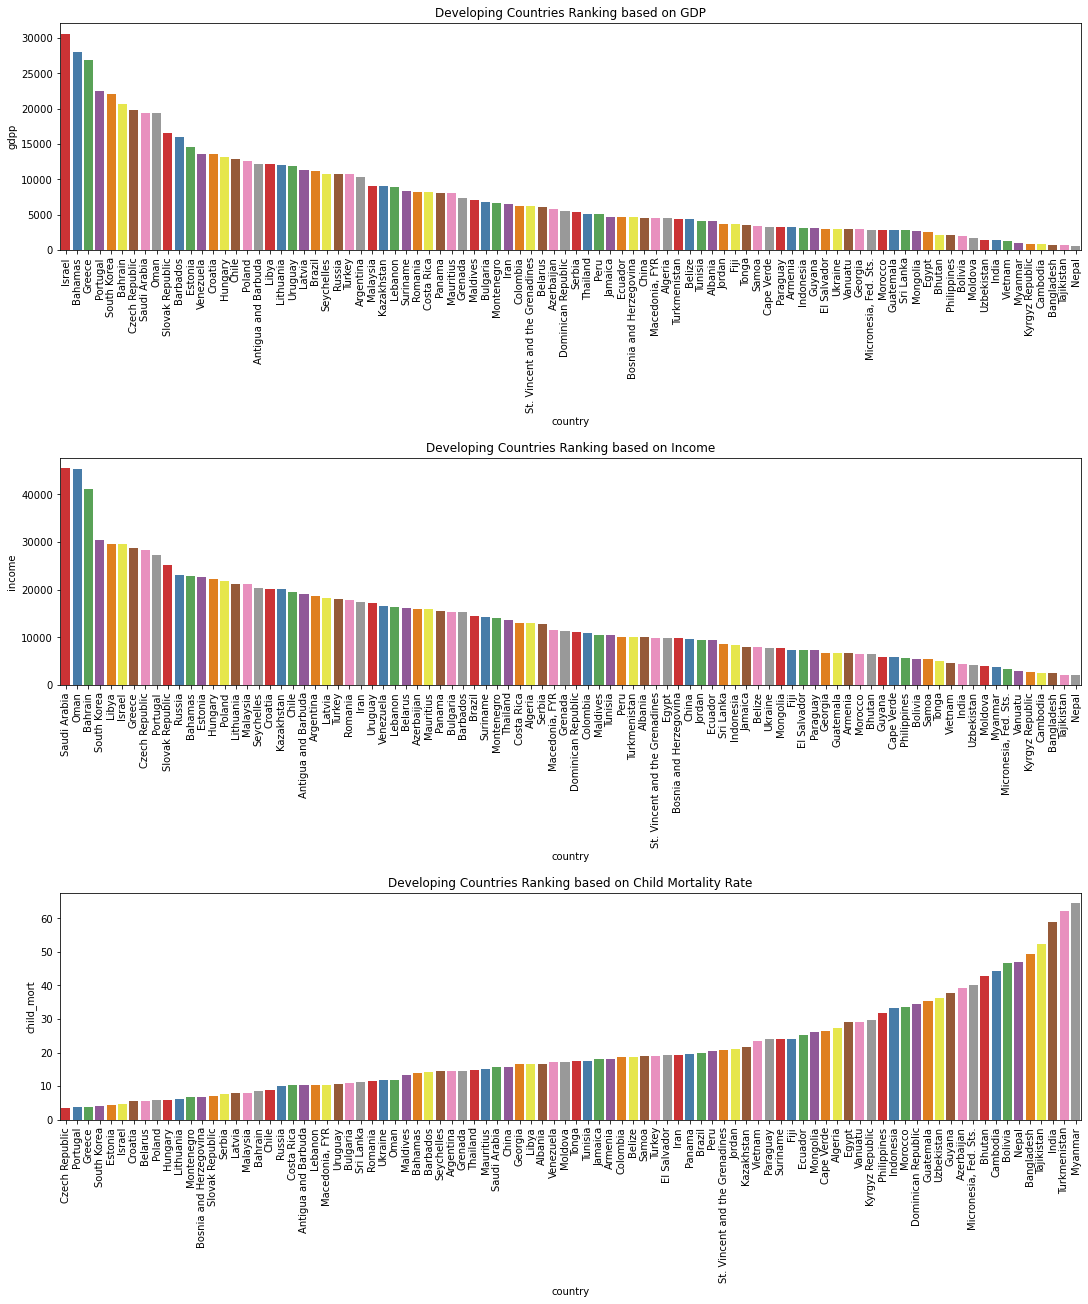

In [39]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the developing countries on the basis of 'gdp'
gdp_developing=df1_kmean[df1_kmean['Clustered Countries']=='Developing'].sort_values(by='gdpp',ascending=False)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_developing,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Developing Countries Ranking based on GDP',fontsize=12)

# Analysing the developing countries on the basis of 'income'
income_developing=df1_kmean[df1_kmean['Clustered Countries']=='Developing'].sort_values(by='income',ascending=False)
ax1=sns.barplot(x='country',y='income',data=income_developing,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Developing Countries Ranking based on Income',fontsize=12)

# Analysing the developing countries on the basis of 'child_mort'
child_mort_developing=df1_kmean[df1_kmean['Clustered Countries']=='Developing'].sort_values(by='child_mort')
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_developing,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Developing Countries Ranking based on Child Mortality Rate',fontsize=12)


### **Finding out the TOP 10 Developing countries based on : GDP , Income and child_mort**

In [40]:
# Finding the TOP 10 Developing countries on the basis of 'gdp'
print('TOP 10 Developing countries based on high GDP are :')
for countries in gdp_developing.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developing countries on the basis of 'income'
print('TOP 10 Developing countries based on high income are :')
for countries in income_developing.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developing countries on the basis of 'child_mort'
print('TOP 10 Developing countries based on low child mortality rate are :')
for countries in child_mort_developing.country[:10]:
  print(countries)


TOP 10 Developing countries based on high GDP are :
Israel
Bahamas
Greece
Portugal
South Korea
Bahrain
Czech Republic
Saudi Arabia
Oman
Slovak Republic


TOP 10 Developing countries based on high income are :
Saudi Arabia
Oman
Bahrain
South Korea
Libya
Israel
Greece
Czech Republic
Portugal
Slovak Republic


TOP 10 Developing countries based on low child mortality rate are :
Czech Republic
Portugal
Greece
South Korea
Estonia
Israel
Croatia
Belarus
Poland
Hungary


### **3) Under-Developed Countries :**

Text(0.5, 1.0, 'Under-Developed Countries Ranking based on Child Mortality Rate')

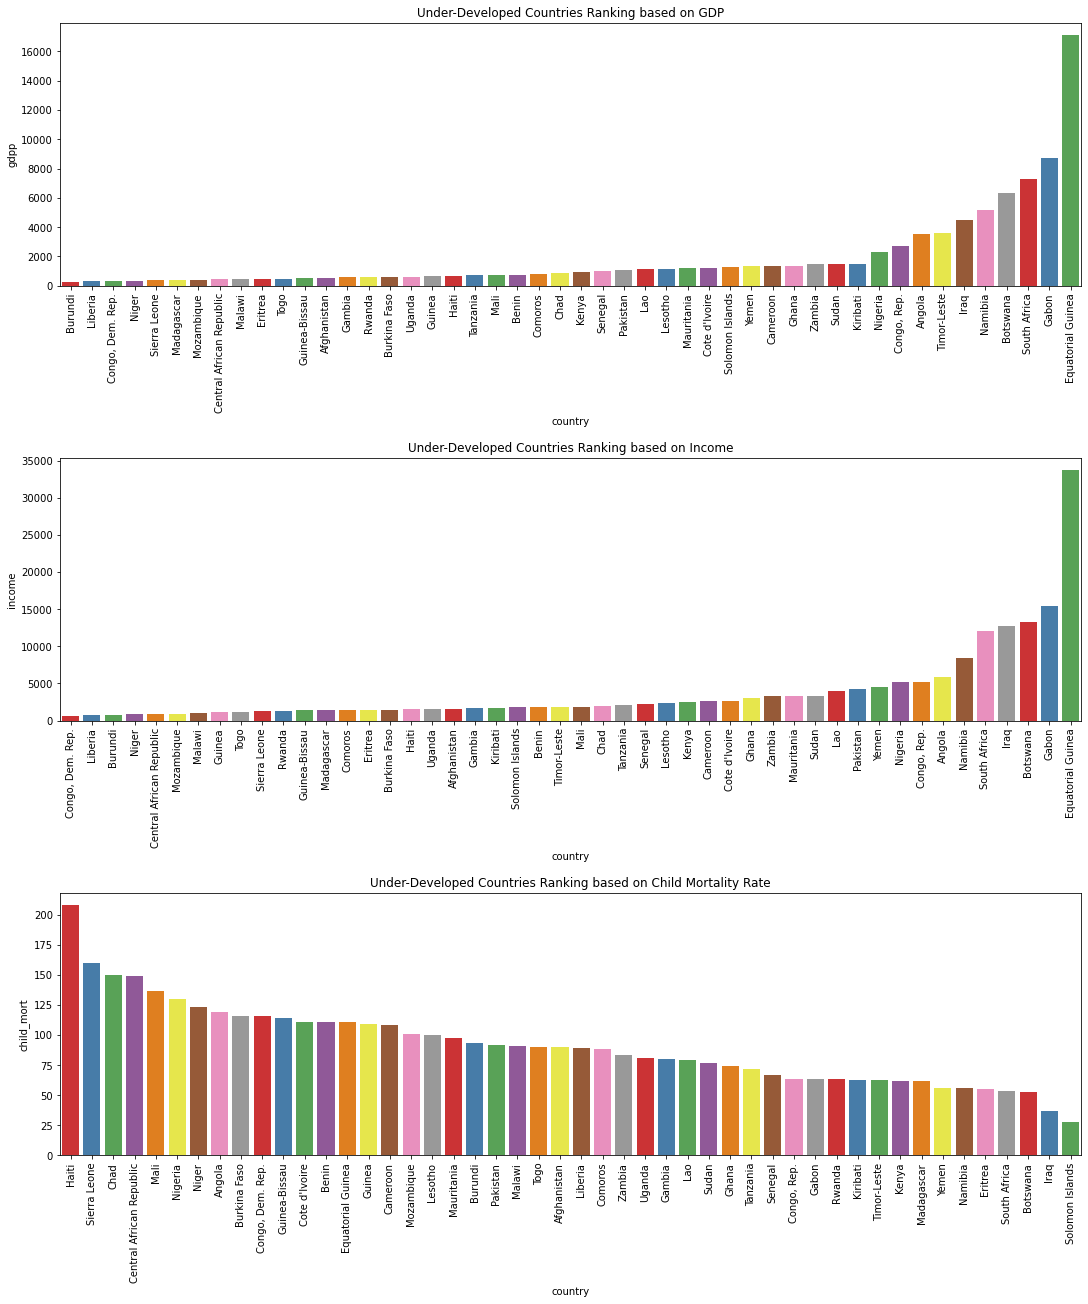

In [41]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the under-developed countries on the basis of 'gdp'
gdp_under_developed=df1_kmean[df1_kmean['Clustered Countries']=='Under-Developed'].sort_values(by='gdpp',ascending=True)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_under_developed,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Under-Developed Countries Ranking based on GDP',fontsize=12)

# Analysing the under-developed countries on the basis of 'income'
income_under_developed=df1_kmean[df1_kmean['Clustered Countries']=='Under-Developed'].sort_values(by='income',ascending=True)
ax1=sns.barplot(x='country',y='income',data=income_under_developed,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Under-Developed Countries Ranking based on Income',fontsize=12)

# Analysing the Under-developed countries on the basis of 'child_mort'
child_mort_under_developed=df1_kmean[df1_kmean['Clustered Countries']=='Under-Developed'].sort_values(by='child_mort',ascending=False)
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_under_developed,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Under-Developed Countries Ranking based on Child Mortality Rate',fontsize=12)


### **Finding out the TOP 10 Under-Developed countries based on : GDP , Income and child_mort**

In [42]:
# Finding the TOP 10 Under-Developed countries on the basis of 'gdp'
print('TOP 10 Under-Developed countries based on LOW GDP are :')
for countries in gdp_under_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Under-Developed countries on the basis of 'income'
print('TOP 10 Under-Developed countries based on LOW income are :')
for countries in income_under_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Under-Developed countries on the basis of 'child_mort'
print('TOP 10 Under-Developed countries based on HIGH child mortality rate are :')
for countries in child_mort_under_developed.country[:10]:
  print(countries)


TOP 10 Under-Developed countries based on LOW GDP are :
Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Madagascar
Mozambique
Central African Republic
Malawi
Eritrea


TOP 10 Under-Developed countries based on LOW income are :
Congo, Dem. Rep.
Liberia
Burundi
Niger
Central African Republic
Mozambique
Malawi
Guinea
Togo
Sierra Leone


TOP 10 Under-Developed countries based on HIGH child mortality rate are :
Haiti
Sierra Leone
Chad
Central African Republic
Mali
Nigeria
Niger
Angola
Burkina Faso
Congo, Dem. Rep.


## **Finding the countries which are in Need of Aid by using K-means Clustering :**


**The countries which are in Need of Aid will be in the cluster of the Under-Developed countries and we can select those countries which are having :**
* income less than or equal to (<=) 3897.35 (mean income for Under-developed countries) , 
* gdpp less than or equal to (<=) 1909.2 (mean gdp for Under-developed countries) and
* child mortality rate greater than or equal to (>=) 91.6 (mean child mortality rate for Under-developed countries) 


In [45]:
needy_kmean=df1_kmean[df1_kmean['Clustered Countries']=='Under-Developed']
needy_kmean=needy_kmean[needy_kmean['income']<=3897.35]      # less income
needy_kmean=needy_kmean[needy_kmean['gdpp']<=1909.2]         # less gdpp 
needy_kmean=needy_kmean[needy_kmean['child_mort']>=91.6]     # more child_mort

print("List of all the countries which are in DIRE NEED OF AID by KMeans Clustering  :")

# Sorting the needy countries on the basis of 'income','gdp' and 'child_mort'
needy_kmean=needy_kmean.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
needy_kmean.country

List of all the countries which are in DIRE NEED OF AID by KMeans Clustering  :


26                      Burundi
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
106                  Mozambique
31     Central African Republic
64                Guinea-Bissau
25                 Burkina Faso
63                       Guinea
66                        Haiti
97                         Mali
17                        Benin
32                         Chad
87                      Lesotho
99                   Mauritania
40                Cote d'Ivoire
28                     Cameroon
Name: country, dtype: object

## 5.5 **List of TOP 10 countries which are in Direst Need of Aid by using K-means Clustering are:**


In [47]:
print("List of TOP 10 countries which are in Direst Need of Aid by using K-means Clustering are:")
for country in needy_kmean.country[:10]:
  print(country)

List of TOP 10 countries which are in Direst Need of Aid by using K-means Clustering are:
Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti


## **6) HIERARCHICAL CLUSTERING**

### **6.1) Single Linkage :**


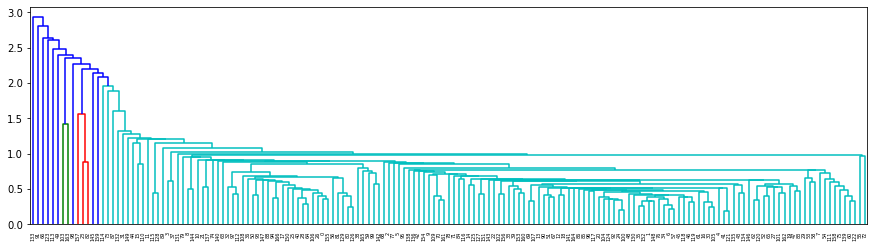

In [48]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Single linkage
plt.figure(figsize=(15,4))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### **6.2) Complete Linkage :**


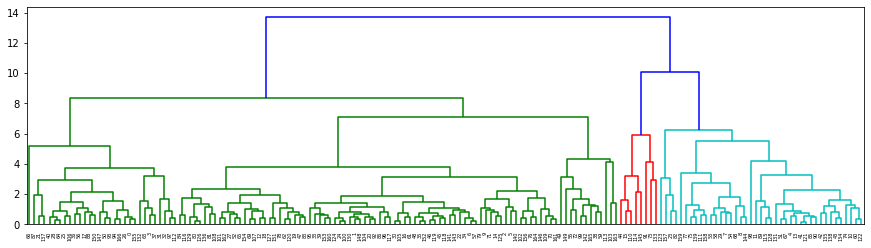

In [49]:
plt.figure(figsize=(15,4))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From above complete linkage diagram we can choose number of clusters = 3

In [50]:
#  Cutting the tree at a point where we get 3 clusters
from scipy.cluster.hierarchy import cut_tree

h_cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
h_cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [51]:
#  Creating a copy of the original dataframe named df1_hier
df1_hier=country_data.copy()

# assign cluster labels
df1_hier['h_cluster_labels'] = h_cluster_labels
df1_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [52]:
# Viewing how many datapoints we have in each cluster
df1_hier.h_cluster_labels.value_counts()

0    118
1     41
2      8
Name: h_cluster_labels, dtype: int64

## 6.3. Visualising clusters based on labels 

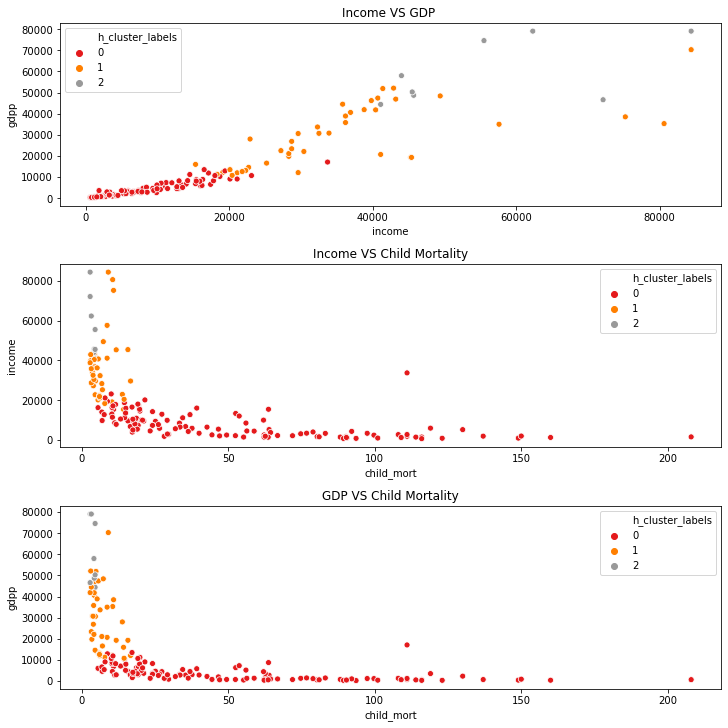

In [53]:
# Visualizing through scatterplots
fig,axes = plt.subplots(3,figsize=(10,10),constrained_layout=True)

# Plot between income vs gdpp
ax0=sns.scatterplot(x='income',y='gdpp',hue='h_cluster_labels',data=df1_hier,palette='Set1',ax=axes[0])
ax0.set_title('Income VS GDP ',fontsize=12)

# Plot between income vs child_mort
ax1=sns.scatterplot(x='child_mort',y='income',hue='h_cluster_labels',data=df1_hier,palette='Set1',ax=axes[1])
ax1.set_title('Income VS Child Mortality')

# Plot between gdpp and child_mort
ax2=sns.scatterplot(x='child_mort',y='gdpp',hue='h_cluster_labels',data=df1_hier,palette='Set1',ax=axes[2])
ax2.set_title('GDP VS Child Mortality')

plt.show()

## 6.4. Cluster Profiling wrt gdpp, income, child mortality

In [54]:
#Cluster Profiling
h_cluster=df1_hier.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('h_cluster_labels').mean()
h_cluster

,child_mort,income,gdpp
h_cluster_labels,,,
0,51.512712,7581.889831,3732.322034
1,6.882927,35853.024390,29492.682927
2,3.825000,56321.750000,60097.000000


#### Analysing the clusters by comparing how the 'gdpp', 'child_mort' and 'income' vary for each cluster of countries .

### Comparisons between the clusters 

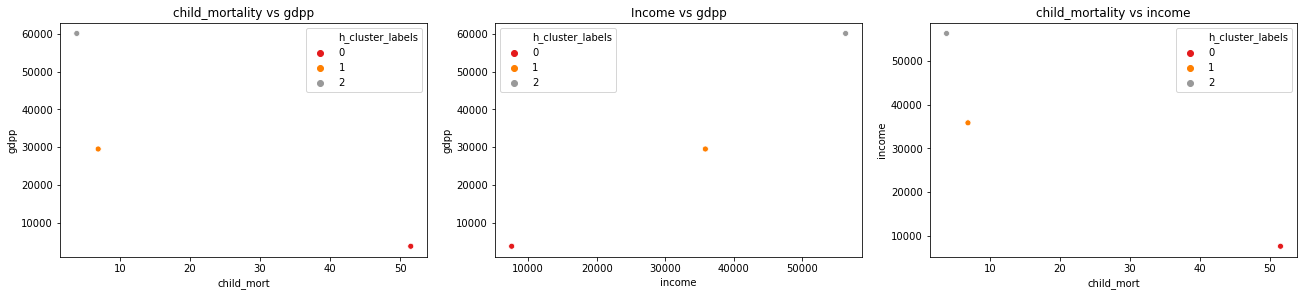

In [55]:
fig, axes = plt.subplots(1,3,figsize=(18,4),constrained_layout=True)

ax0=sns.scatterplot(x='child_mort',y='gdpp',data=h_cluster,hue=h_cluster.index,palette='Set1',ax=axes[0])
ax0.title.set_text('child_mortality vs gdpp')

ax1=sns.scatterplot(x='income',y='gdpp',data=h_cluster,hue=h_cluster.index,palette='Set1',ax=axes[1])
ax1.title.set_text('Income vs gdpp')

ax2=sns.scatterplot(x='child_mort',y='income',data=h_cluster,hue=h_cluster.index,palette='Set1',ax=axes[2])
ax2.title.set_text('child_mortality vs income')

### **Label 0 :**
 * Subplot(1) shows **high child mortality , low gdpp**
 * Subplot(2) shows **low income , low gdpp**
 * Subplot(3) shows **high child mortality , low income**

 Therefore these can be considerd as ***Under-Developed Countries***. 

### **Label 1 :**
 * Subplot(1) shows **low child mortality , low gdpp**
 * Subplot(2) shows **Low income , low gdpp**
 * Subplot(3) shows **low child mortality , low income**

 Therefore these can be considerd as ***Developing Countries.***

### **Label 2 :**
 * Subplot(1) shows **Low child mortality , high gdpp**
 * Subplot(2) shows**high income , high gdpp**
 * Subplot(3) shows **low child mortality , high income**

 Therefore these can be considerd as ***Developed Countries.***



#### Renaming the Labels into countries as categorized above ie., Developing , Developing and Underdeveloped Countries.

In [56]:
h_cluster.rename(index={0: 'Under-Developed'},inplace=True)
h_cluster.rename(index={1: 'Developing'},inplace=True)
h_cluster.rename(index={2: 'Developed'},inplace=True)

### **Understanding the Clusters by Plotting them based on three factors :**
* gdpp
* income
* child_mort

### **1) Barplots:**


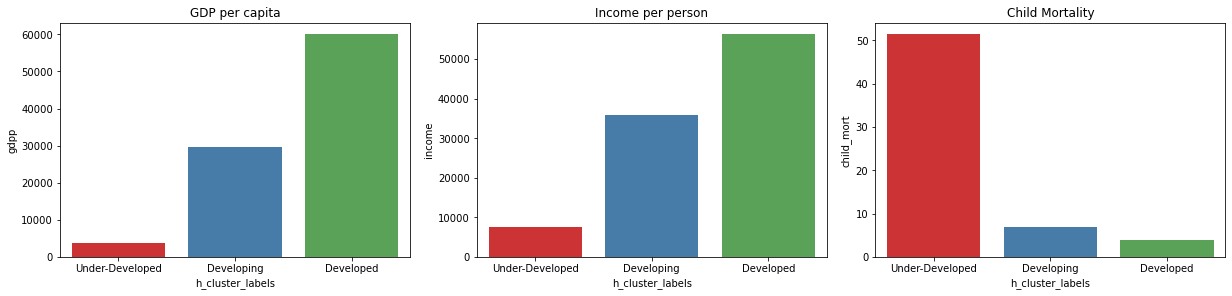

In [57]:
fig, axes = plt.subplots(1,3,figsize=(17,4),constrained_layout=True)

ax0=sns.barplot(x=h_cluster.index,y='gdpp',data=h_cluster,palette='Set1',ax=axes[0])
ax0.title.set_text('GDP per capita')

ax1=sns.barplot(x=h_cluster.index,y='income',data=h_cluster,palette='Set1',ax=axes[1])
ax1.title.set_text('Income per person')

ax2=sns.barplot(x=h_cluster.index,y='child_mort',data=h_cluster,palette='Set1',ax=axes[2])
ax2.title.set_text('Child Mortality')

**Inferences from the above bar chart :**
* All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and under-developed countries are having the least GDPP values.
* All the developed countries are having high income per person, developing countries are having average income per person and under-developed countries are having the least income per person.
* All the developed countries are having least number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and under-developed countries are having the highest death rate.

### **2) Scatterplots:**

Adding a column 'Clustered Countries' to the dataframe df1_hier to visualize all the countries under the clusters of Developing , Developed and Underdeveloped countries.

In [58]:
for i,label in enumerate(df1_hier.h_cluster_labels):
    if(label==0):
        df1_hier.loc[i,'Clustered Countries']='Under-Developed'
    elif(label==1):
        df1_hier.loc[i,'Clustered Countries']='Developing'
    else:
        df1_hier.loc[i,'Clustered Countries']='Developed'
        
# Looking at the dataframe after adding the above column
df1_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster_labels,Clustered Countries
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,Under-Developed
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,Under-Developed
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,Developing


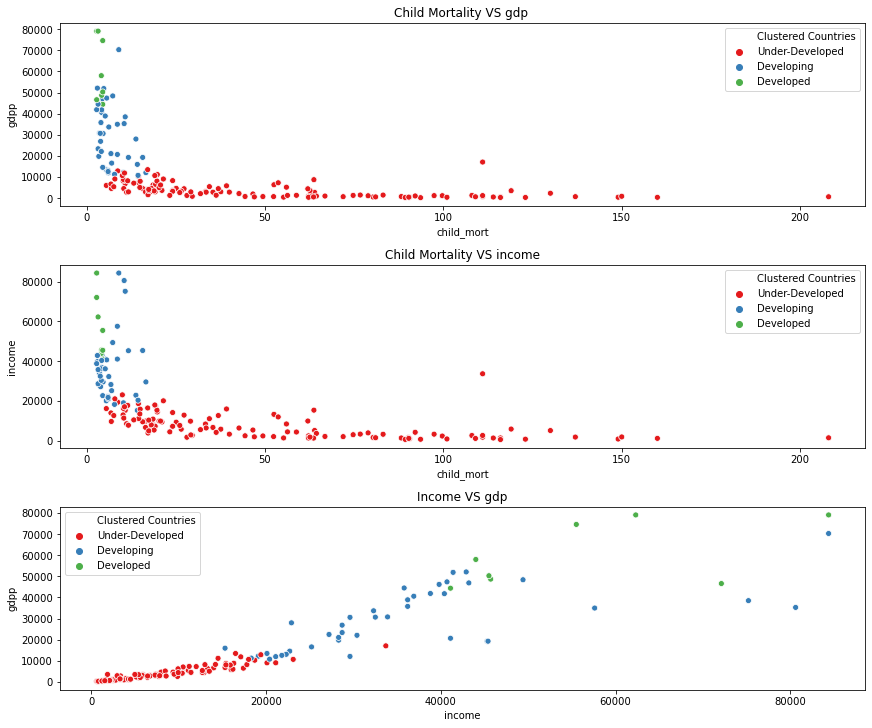

In [59]:
# Visualizing the clusters through scatterplots
fig, axes = plt.subplots(3,figsize=(12,10),constrained_layout=True)

ax0=sns.scatterplot(x='child_mort',y='gdpp',data=df1_hier,hue='Clustered Countries',palette='Set1',ax=axes[0])
ax0.title.set_text('Child Mortality VS gdp ')

ax1=sns.scatterplot(x='child_mort',y='income',data=df1_hier,hue='Clustered Countries',palette='Set1',ax=axes[1])
ax1.title.set_text('Child Mortality VS income')

ax2=sns.scatterplot(x='income',y='gdpp',data=df1_hier,hue='Clustered Countries',palette='Set1',ax=axes[2])
ax2.title.set_text('Income VS gdp')

**Inferences from the above scatterplots:**
* In the Child_mortality VS gdpp subplot : we observe that clusters are formed which show that if child_mortality is low, the gdpp is high and vice versa.
* In the Child_mortality VS Income subplot: we observe that clusters are formed which show that if child mortality is low then income is high and vice versa.
* In the Income VS gdpp subplot: we observe that clusters are formed which show that if income is more then gdpp is also more and vice versa.

### **3) Boxplots:**

Text(0.5, 1.0, 'Child Mortality rate')

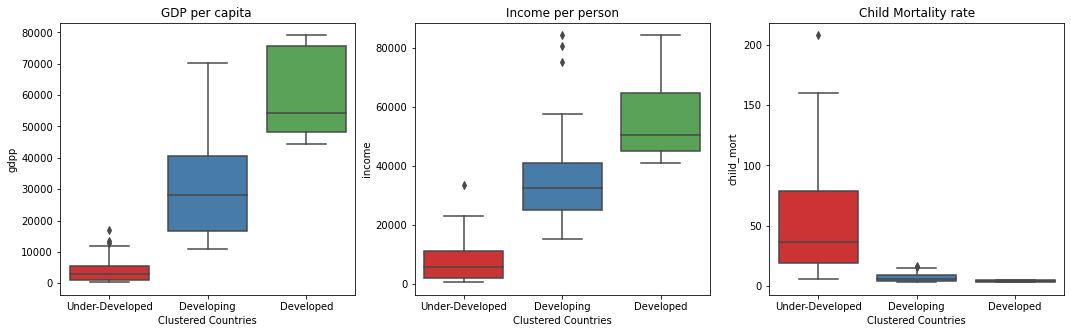

In [60]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

ax0=sns.boxplot(x='Clustered Countries',y='gdpp',data=df1_hier,palette='Set1',ax=axes[0])
ax0.set_title('GDP per capita ')

ax1=sns.boxplot(x='Clustered Countries',y='income',data=df1_hier,palette='Set1',ax=axes[1])
ax1.set_title('Income per person')

ax2=sns.boxplot(x='Clustered Countries',y='child_mort',data=df1_hier,palette='Set1',ax=axes[2])
ax2.set_title('Child Mortality rate')

**Inferences from the boxplots above:**

* From the boxplot above for gdp per capita we see that gdp is high for developed countries , less in developing countries and least in under-developed countries.
* From the boxplot above for income per person we see that income is high for developed countries , less in developing countries and least in under-developed countries.
* From the boxplot above for child mortality rate we see that child mortality is high for under-developed countries , less in developing countries and least in developed countries.




### **Analysing the different countries under the three clusters on the basis of :**
* gdpp
* income
* child_mort


### **1) Developed Countries :**

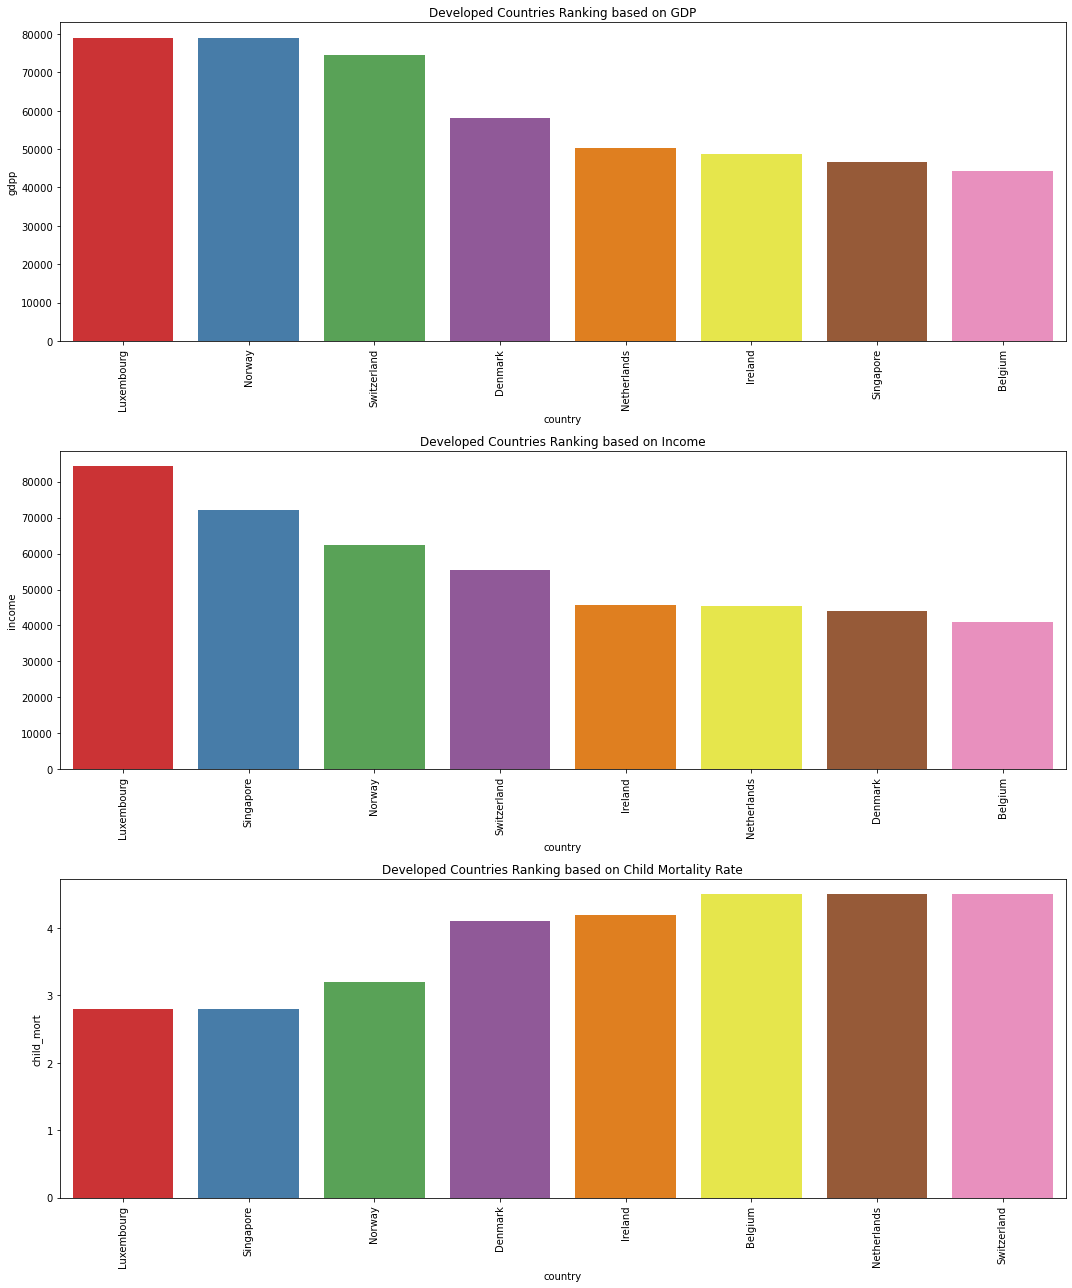

In [61]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the developed countries on the basis of 'gdp'
gdp_developed=df1_hier[df1_hier['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_developed,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Developed Countries Ranking based on GDP',fontsize=12)

# Analysing the developed countries on the basis of 'income'
income_developed=df1_hier[df1_hier['Clustered Countries']=='Developed'].sort_values(by='income',ascending=False)
ax1=sns.barplot(x='country',y='income',data=income_developed,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Developed Countries Ranking based on Income',fontsize=12)

# Analysing the developed countries on the basis of 'child_mort'
child_mort_developed=df1_hier[df1_hier['Clustered Countries']=='Developed'].sort_values(by='child_mort')
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_developed,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Developed Countries Ranking based on Child Mortality Rate',fontsize=12)

plt.tight_layout()

### **Finding out the TOP  Developed countries based on : GDP , Income and child_mort**

In [62]:
# Finding the TOP  Developed countries on the basis of 'gdp'
print('TOP Developed countries based on high GDP are :')
for countries in gdp_developed.country[:]:
  print(countries)

print('\n')
# Finding the TOP  Developed countries on the basis of 'income'
print('TOP  Developed countries based on high income are :')
for countries in income_developed.country[:]:
  print(countries)

print('\n')
# Finding the TOP  Developed countries on the basis of 'child_mort'
print('TOP  Developed countries based on low child mortality rate are :')
for countries in child_mort_developed.country[:]:
  print(countries)


TOP Developed countries based on high GDP are :
Luxembourg
Norway
Switzerland
Denmark
Netherlands
Ireland
Singapore
Belgium


TOP  Developed countries based on high income are :
Luxembourg
Singapore
Norway
Switzerland
Ireland
Netherlands
Denmark
Belgium


TOP  Developed countries based on low child mortality rate are :
Luxembourg
Singapore
Norway
Denmark
Ireland
Belgium
Netherlands
Switzerland


### **2) Developing Countries :**

Text(0.5, 1.0, 'Developing Countries Ranking based on Child Mortality Rate')

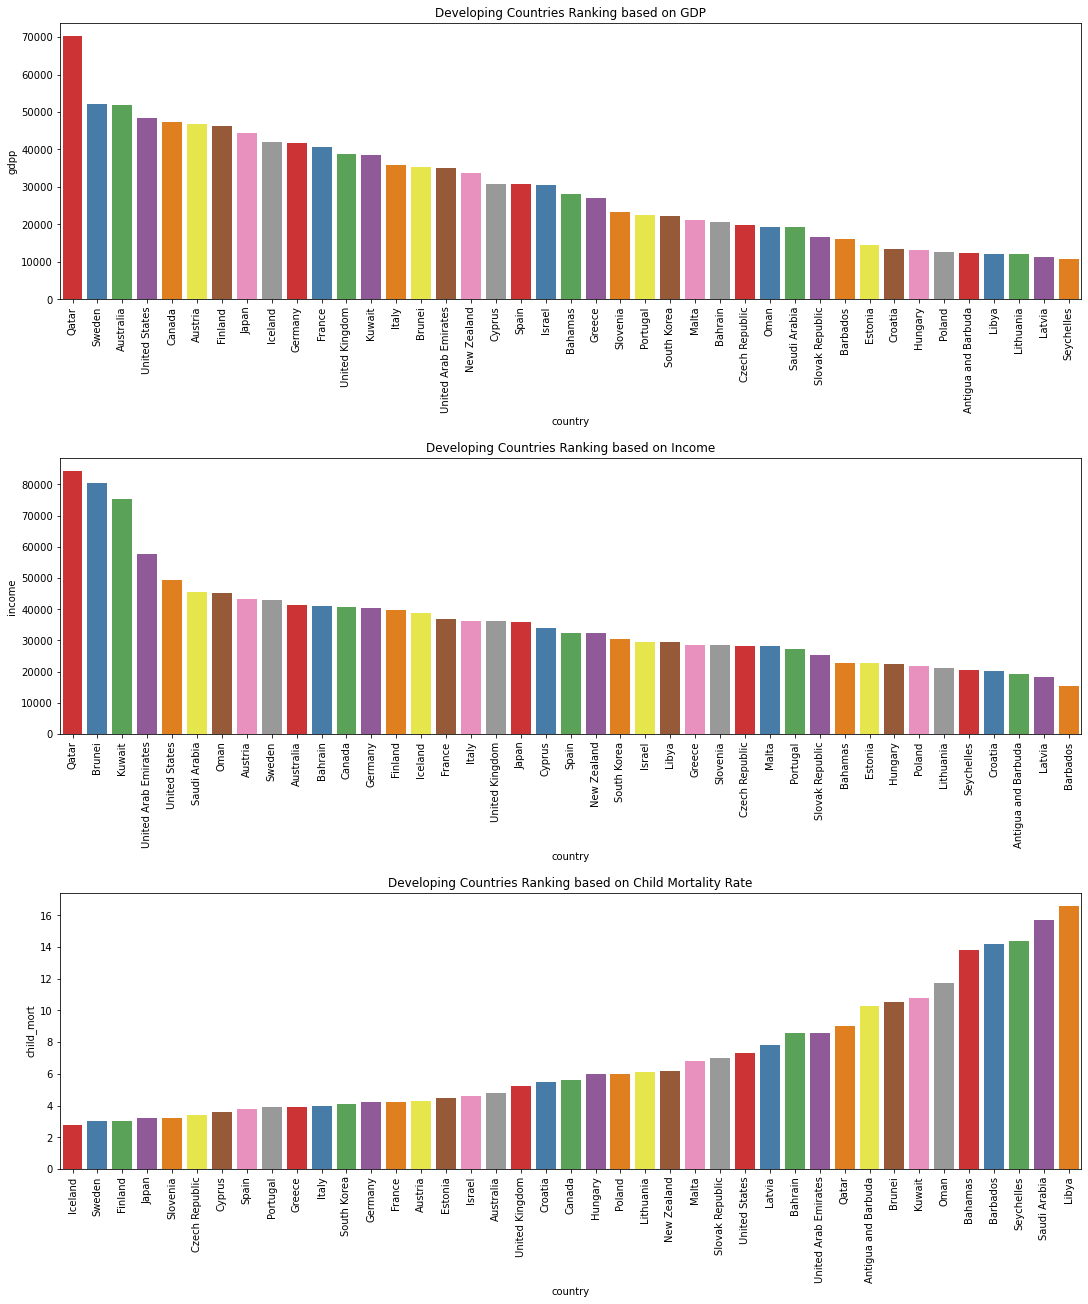

In [63]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the developing countries on the basis of 'gdp'
gdp_developing=df1_hier[df1_hier['Clustered Countries']=='Developing'].sort_values(by='gdpp',ascending=False)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_developing,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Developing Countries Ranking based on GDP',fontsize=12)

# Analysing the developing countries on the basis of 'income'
income_developing=df1_hier[df1_hier['Clustered Countries']=='Developing'].sort_values(by='income',ascending=False)
ax1=sns.barplot(x='country',y='income',data=income_developing,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Developing Countries Ranking based on Income',fontsize=12)

# Analysing the developing countries on the basis of 'child_mort'
child_mort_developing=df1_hier[df1_hier['Clustered Countries']=='Developing'].sort_values(by='child_mort')
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_developing,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Developing Countries Ranking based on Child Mortality Rate',fontsize=12)


### **Finding out the TOP 10 Developing countries based on : GDP , Income and child_mort**

In [64]:
# Finding the TOP 10 Developing countries on the basis of 'gdp'
print('TOP 10 Developing countries based on high GDP are :')
for countries in gdp_developing.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developing countries on the basis of 'income'
print('TOP 10 Developing countries based on high income are :')
for countries in income_developing.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Developing countries on the basis of 'child_mort'
print('TOP 10 Developing countries based on low child mortality rate are :')
for countries in child_mort_developing.country[:10]:
  print(countries)


TOP 10 Developing countries based on high GDP are :
Qatar
Sweden
Australia
United States
Canada
Austria
Finland
Japan
Iceland
Germany


TOP 10 Developing countries based on high income are :
Qatar
Brunei
Kuwait
United Arab Emirates
United States
Saudi Arabia
Oman
Austria
Sweden
Australia


TOP 10 Developing countries based on low child mortality rate are :
Iceland
Sweden
Finland
Japan
Slovenia
Czech Republic
Cyprus
Spain
Portugal
Greece


### **3) Under-Developed Countries :**

Text(0.5, 1.0, 'Under-Developed Countries Ranking based on Child Mortality Rate')

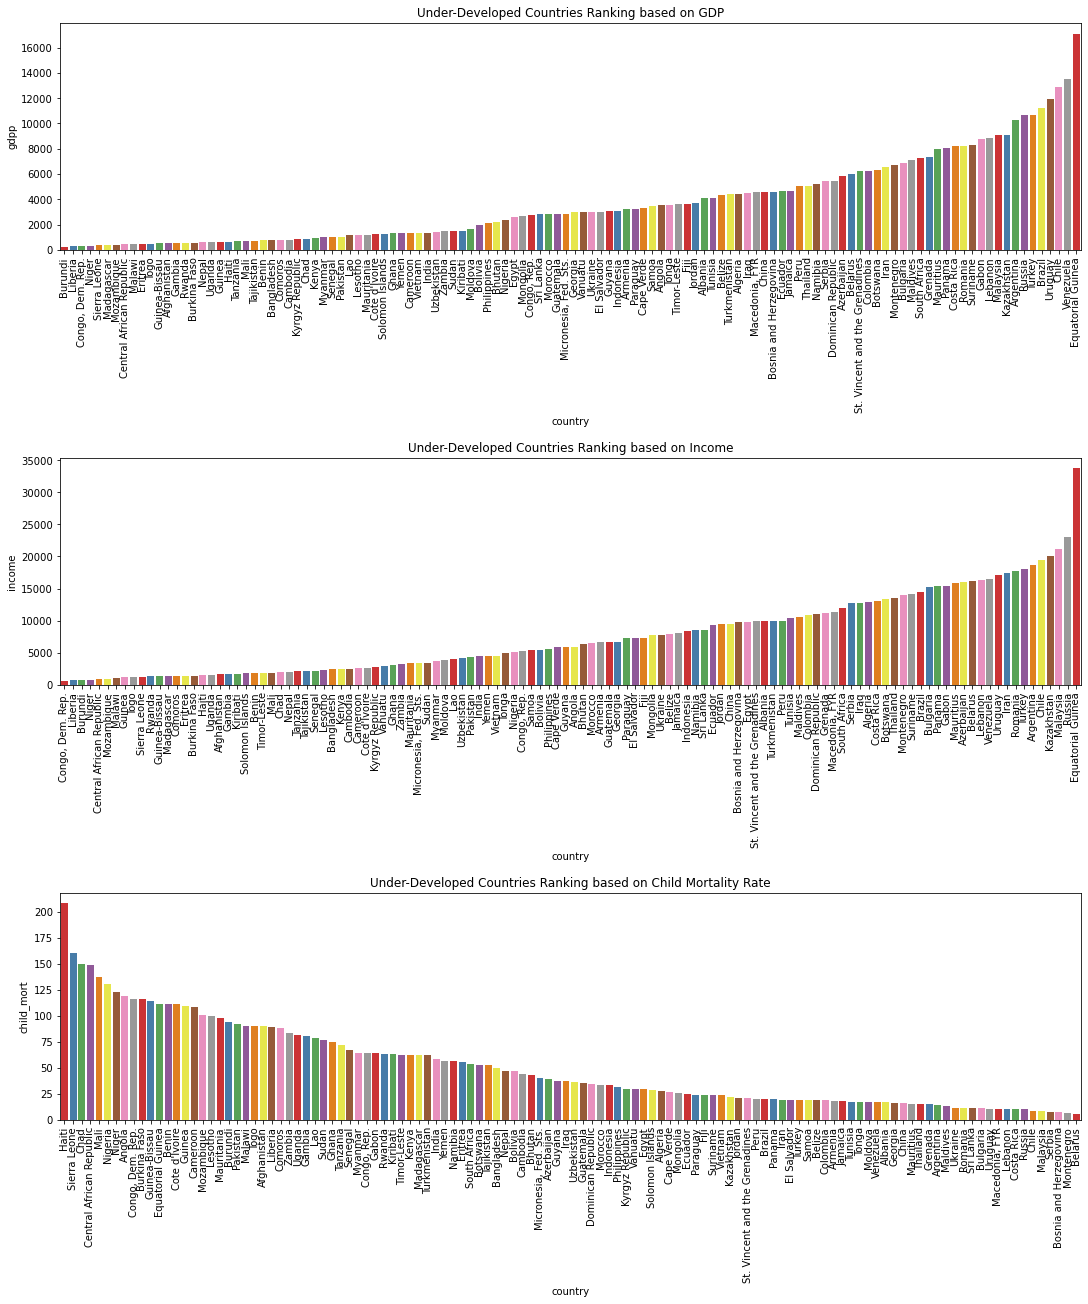

In [65]:
fig, axes = plt.subplots(3,figsize=(15,18),constrained_layout=True)

# Analysing the under-developed countries on the basis of 'gdp'
gdp_under_developed=df1_hier[df1_hier['Clustered Countries']=='Under-Developed'].sort_values(by='gdpp',ascending=True)
ax0=sns.barplot(x='country',y='gdpp',data=gdp_under_developed,palette='Set1',ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title('Under-Developed Countries Ranking based on GDP',fontsize=12)

# Analysing the under-developed countries on the basis of 'income'
income_under_developed=df1_hier[df1_hier['Clustered Countries']=='Under-Developed'].sort_values(by='income',ascending=True)
ax1=sns.barplot(x='country',y='income',data=income_under_developed,palette='Set1',ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title('Under-Developed Countries Ranking based on Income',fontsize=12)

# Analysing the Under-developed countries on the basis of 'child_mort'
child_mort_under_developed=df1_hier[df1_hier['Clustered Countries']=='Under-Developed'].sort_values(by='child_mort',ascending=False)
ax2=sns.barplot(x='country',y='child_mort',data=child_mort_under_developed,palette='Set1',ax=axes[2])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title('Under-Developed Countries Ranking based on Child Mortality Rate',fontsize=12)


### **Finding out the TOP 10 Under-Developed countries based on : GDP , Income and child_mort**

In [66]:
# Finding the TOP 10 Under-Developed countries on the basis of 'gdp'
print('TOP 10 Under-Developed countries based on low GDP are :')
for countries in gdp_under_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Under-Developed countries on the basis of 'income'
print('TOP 10 Under-Developed countries based on low income are :')
for countries in income_under_developed.country[:10]:
  print(countries)

print('\n')
# Finding the TOP 10 Under-Developed countries on the basis of 'child_mort'
print('TOP 10 Under-Developed countries based on high child mortality rate are :')
for countries in child_mort_under_developed.country[:10]:
  print(countries)


TOP 10 Under-Developed countries based on low GDP are :
Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Madagascar
Mozambique
Central African Republic
Malawi
Eritrea


TOP 10 Under-Developed countries based on low income are :
Congo, Dem. Rep.
Liberia
Burundi
Niger
Central African Republic
Mozambique
Malawi
Guinea
Togo
Sierra Leone


TOP 10 Under-Developed countries based on high child mortality rate are :
Haiti
Sierra Leone
Chad
Central African Republic
Mali
Nigeria
Niger
Angola
Congo, Dem. Rep.
Burkina Faso


## **Finding all the countries which are in Need of Aid by using Hierarchical Clustering :**


The countries which are in Need of Aid will be in the cluster of the Under-Developed countries and we can select those countries which are having :
* income less than or equal to (<=) 7581.8 (mean income for Under-developed countries) , 
* gdpp less than or equal to (<=) 3732.32 (mean gdp for Under-developed countries) and
* child mortality rate greater than or equal to (>=) 51.5 (mean child mortality rate for Under-developed countries) 


In [71]:
needy_hier=df1_hier[df1_hier['Clustered Countries']=='Under-Developed']
needy_hier=needy_hier[needy_hier['income']<=7581.8]      # less income
needy_hier=needy_hier[needy_hier['gdpp']<=3732.32]         # less gdpp 
needy_hier=needy_hier[needy_hier['child_mort']>=51.5]     # more child_mort

print("List of all the countries which are in DIRE NEED OF AID by Hierarchical Clustering :")

# Sorting the needy countries on the basis of 'income','gdp' and 'child_mort'
needy_hier=needy_hier.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])
needy_hier.country

List of all the countries which are in DIRE NEED OF AID by Hierarchical Clustering :


26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
150                        Togo
64                Guinea-Bissau
0                   Afghanistan
56                       Gambia
126                      Rwanda
25                 Burkina Faso
155                      Uganda
63                       Guinea
66                        Haiti
147                    Tanzania
97                         Mali
146                  Tajikistan
17                        Benin
36                      Comoros
32                         Chad
80                        Kenya
107                     Myanmar
129                     Senegal
116                    Pakistan
84                          Lao
87                      Lesotho
99      

## 6.5 **List of TOP 10 countries which are in Direst Need of Aid by using Hierarchical Clustering are:**


In [68]:
print("List of TOP 10 countries which are in Direst Need of Aid by using Hierarchical Clustering are:")
for country in needy_hier.country[:10]:
  print(country)

List of TOP 10 countries which are in Direst Need of Aid by using Hierarchical Clustering are:
Burundi
Liberia
Congo, Dem. Rep.
Niger
Sierra Leone
Madagascar
Mozambique
Central African Republic
Malawi
Eritrea


## 7. Results 

#### 1) Since we need to find out the countries which are in dire need of aid as per socio-economic factors , so based on the factor conditions ie., 
* Low income
* Low gdpp
* High child mortality 

I have reported the Under-developed countries  as these will be the countries 
which are in dire need of aid.


#### 2) On comparing both Kmeans and Hierarchical Clustering alogorithms , I will choose the countries which I get in Hierarchical clustering because:
* Hierarchical clusering gave more number of countries as compared to Kmeans
* Hierachical clustering does not require prior knowledge of clusters as is required by Kmeans clustering algo .
* In K means , since we proceed with random choice of clusters therefore the results produced by running it multiple times  may differ which is not the case with hierarchical as the results are reproducible in this. 

**So TOP 10 countries which are in dire need of aid  reported to the CEO are that with Heirarchical Clustering:**

1) Burundi

2) Liberia

3) Congo, Dem. Rep.

4) Niger

5) Sierra Leone

6) Madagascar

7) Mozambique

8) Central African Republic

9) Malawi

10) Eritrea




#### 3) We have grouped the countries into three groups: Developed , Developing and Under-Developed based on three socio-economic factors  : gdpp,income , child mortality
* Developed countries are those with high GDPP , high income and low child_mortality
* Under-developed countries are those with low income, low gdpp and high child_mort
* Developing countries come inbetween the developing and developed countries

## 8.Recommendations:

The bar chart for under-developed countries shows how the socio-economic and health situation varies in different countries:

* Countries like Haiti, Sierra Leone , Chad  etc  have  the  child mortality rate very high ie., the rate of children dying  under 5 years  per 1000 is ver high .
* Countries like  Berundi , Niger , Liberia , Congo etc have very low income per person and also low GDP per capita . Therefore these countries can be termed as POOR countries.

**So In order to  Resolve  these countries need  :**

* **Child mortality rate can be decreased**

* **Income per person should be increased** 

* **GDP per capita should be increased.**


